In [214]:
# importación de las librerias que serán utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [215]:
#Lectura del dataset 
df=pd.read_csv('train.csv')
dg=pd.read_csv('test_x.csv')

In [216]:
#Visualización de la información que contine el dataset de entrenamiento 
df

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
...,...,...,...,...,...,...,...,...,...,...
6996,6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,6997,18,57,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,6998,22,47,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,6999,18,14,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0


In [217]:
#Visualización de la información que contine el dataset de prueba 
dg

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
2,7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
3,7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
4,7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616
...,...,...,...,...,...,...,...,...,...
2995,9995,3,26,-101.913083,87.337077,77.193476,-79.694034,13.273965,143.004786
2996,9996,21,6,52.424913,-37.107249,120.373905,208.090551,-135.567057,-53.867634
2997,9997,21,0,-103.295133,34.736979,-195.018118,-164.294768,-26.993064,6.063715
2998,9998,20,13,170.027159,-73.100306,-117.330651,11.353824,-3.366007,-140.113661


Realicemos un pequeño análisis de los datos con los que trabajaremos:

In [218]:
# El data set contiene diferentes tipos de insectos, por lo que realizaremso una conteo de la cantidad por tipo de insecto: 
df['Insect'].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

Como podemos ver hay 3519 ejemplos de tipo 0, 2793 ejemplos de tipo 1 y 689 ejemplos de tipo 2, danto un total de 7001 ejemplos que contiene el dataset, para poder tener una idea mas clara de la distribución de estos datos por tipo, veamos una representacion grafica de esta infomación:

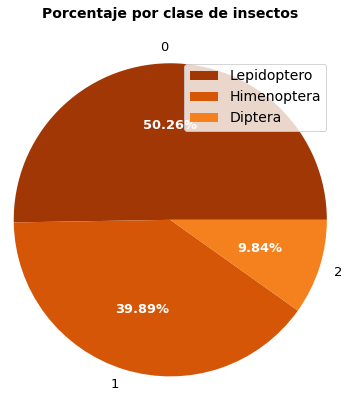

In [219]:
#Creación de una gráfica para representar el porcentaje de los insectos segun sus 3 clases:
Gender = df['Insect'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje por clase de insectos', y=1.1,  weight='bold', fontsize=14)
ax.legend(labels=['Lepidoptero','Himenoptera','Diptera'], fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

En base a esta informacion podermos deducir que necesitaremos aplicar alguna técnica para equilibrar la cantidad de datos que posee el dataset y con eso los resultados no se vean afectados debido a las diferencias en cantidad de ejemplos que hay entre cada clase.

In [220]:
#Visualizamos la informacion básica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


In [221]:
#Visualización de la información estadística del conjunto de datos
df.describe()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.00000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,3500.00000,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,2021.15895,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,0.00000,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,1750.00000,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,3500.00000,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,5250.00000,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,7000.00000,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


In [222]:
#Validación si hay algún valor nulo en el conjunto de datos.
df.isna().any()

Unnamed: 0           False
Hour                 False
Minutes              False
Sensor_alpha         False
Sensor_beta          False
Sensor_gamma         False
Sensor_alpha_plus    False
Sensor_beta_plus     False
Sensor_gamma_plus    False
Insect               False
dtype: bool

In [223]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df.corr()
corr_matrix["Insect"].sort_values(ascending=False)

Insect               1.000000
Sensor_beta          0.366754
Hour                 0.085208
Sensor_alpha         0.008430
Unnamed: 0           0.004724
Sensor_beta_plus     0.000202
Sensor_gamma_plus   -0.001430
Minutes             -0.011447
Sensor_gamma        -0.121449
Sensor_alpha_plus   -0.397456
Name: Insect, dtype: float64

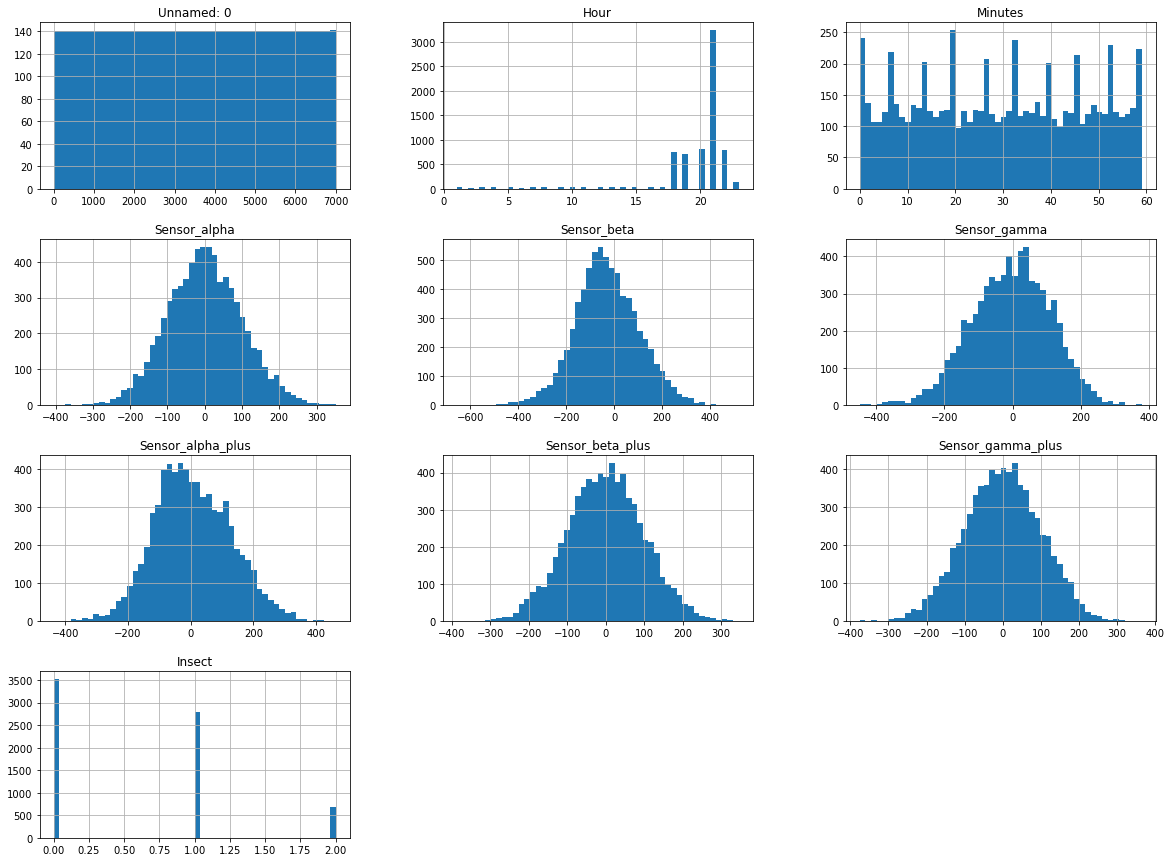

In [224]:
# Representación gráfica de la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [225]:
#Eliminación de datos que son irrelevantes y que podrian afectar el resultado, tanto en el dataset de entrenamiento como en el de pruebas.
df_new = df.drop(['Unnamed: 0'], axis=1)
dg_new = dg.drop(['Unnamed: 0'], axis=1)

In [226]:
#Vizualizamos que los cambios han sido aplicados
df_new

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
...,...,...,...,...,...,...,...,...,...
6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,18,57,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,22,47,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,18,14,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0


In [227]:
#Vizualizamos que los cambios han sido aplicados
dg_new

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
2,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
3,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
4,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616
...,...,...,...,...,...,...,...,...
2995,3,26,-101.913083,87.337077,77.193476,-79.694034,13.273965,143.004786
2996,21,6,52.424913,-37.107249,120.373905,208.090551,-135.567057,-53.867634
2997,21,0,-103.295133,34.736979,-195.018118,-164.294768,-26.993064,6.063715
2998,20,13,170.027159,-73.100306,-117.330651,11.353824,-3.366007,-140.113661


### Escalado de los datos

In [228]:
# Conjunto de datos de entrenamiento
X_df = df_new.drop("Insect", axis=1)
y_df = df_new["Insect"].copy()

In [229]:
#Escalado de los datso en el dataset de entrenamiento 
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_df)

In [230]:
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_df.columns, index=X_df.index)

In [231]:
#Visualización de los cambios
X_scaled

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,0.5,-0.100000,0.889998,1.615593,-1.967848,1.454600,-0.395577,-0.815159
1,-5.5,-0.433333,-0.670122,-1.350907,-1.130848,0.558672,0.281102,0.352736
2,0.0,0.433333,-0.146167,-0.642153,0.321105,-0.518670,-0.372699,0.620926
3,0.0,-0.400000,-0.155279,0.212154,-0.529661,-0.119688,-1.555471,0.118297
4,-1.5,-0.433333,-0.428471,0.133877,-0.968229,0.286642,-0.816164,-0.075003
...,...,...,...,...,...,...,...,...
6996,0.0,-0.966667,0.050821,1.952668,0.922193,-1.205839,-0.963415,-0.372776
6997,-1.5,0.933333,-0.043552,-1.629900,-1.000297,1.442218,-0.835662,0.723223
6998,0.5,0.600000,-0.051847,-2.145715,-1.314883,1.446208,0.874062,0.238408
6999,-1.5,-0.500000,-0.681425,-0.899740,0.558607,0.230708,-0.287584,0.147861


In [232]:
#Escalado de los datso en el dataset de pruebas
scaler = RobustScaler()
dg_scaled = scaler.fit_transform(dg_new)

In [233]:
# Transformación a un DataFrame de Pandas
dg_scaled = pd.DataFrame(dg_scaled, columns=dg_new.columns, index=dg_new.index)

In [234]:
#Visualización de los cambios
dg_scaled

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,0.0,0.066667,-0.523109,0.110219,-0.318445,-0.427109,1.077544,-1.081107
1,0.0,-0.866667,-1.431039,0.396293,0.525717,-0.151052,-0.899875,0.568658
2,0.5,0.066667,0.333466,-0.112654,0.767510,1.088060,-0.054937,-0.868665
3,0.0,-0.133333,-0.463849,1.767362,-0.428273,0.087114,0.295081,0.985990
4,-1.5,-0.600000,1.462790,-0.170211,-0.668512,-0.095150,1.101232,1.680824
...,...,...,...,...,...,...,...,...
2995,-9.0,-0.100000,-0.745948,0.658115,0.475538,-0.468716,0.113087,1.024475
2996,0.0,-0.766667,0.407024,-0.032187,0.738950,1.242375,-0.974210,-0.420584
2997,0.0,-0.966667,-0.756273,0.366338,-1.185029,-0.971729,-0.181067,0.019317
2998,-0.5,-0.533333,1.285564,-0.231843,-0.711114,0.072631,-0.008469,-1.053637


## Balanceo del dataset

## Sobremuestreo 

Como vimos anteriormente el dataset presente un desequilibrio en la cantidad de ejemplos que posee por cada tipo de insecto, por esto vamos a utilizar la técnica de sobremuestreo, para equilibrar la cantidad de ejemplos por cada tipo.

In [235]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0

In [236]:
#ROS. Duplica las muestras de las clases menos representadas
X_Ros, y_Ros = ros.fit_resample(X_scaled, y_df)
X_Ros

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,0.5,-0.100000,0.889998,1.615593,-1.967848,1.454600,-0.395577,-0.815159
1,-5.5,-0.433333,-0.670122,-1.350907,-1.130848,0.558672,0.281102,0.352736
2,0.0,0.433333,-0.146167,-0.642153,0.321105,-0.518670,-0.372699,0.620926
3,0.0,-0.400000,-0.155279,0.212154,-0.529661,-0.119688,-1.555471,0.118297
4,-1.5,-0.433333,-0.428471,0.133877,-0.968229,0.286642,-0.816164,-0.075003
...,...,...,...,...,...,...,...,...
10552,-1.5,0.700000,0.419544,0.550637,-0.349194,-0.383517,0.729439,-0.738403
10553,1.0,-0.600000,0.507024,0.685094,0.214016,-0.333550,-1.052412,-0.424956
10554,1.0,0.800000,-0.337134,0.271104,-0.960295,0.385862,-1.034782,-0.580621
10555,-0.5,-0.233333,0.392485,0.924156,0.003431,-0.923744,0.910292,0.286206


In [237]:
# Validamos la cantidad de ejemplos por cada clase luego de aplicar la técnica de sobremuestreo
y_Ros.value_counts()

2    3519
0    3519
1    3519
Name: Insect, dtype: int64

Como podemos ver, luego de la aplicación de la técnica de sobremuestreo la cantidad de ejemplos por cada insecto es igual, por lo que podemos proceder a entrenar nuestro modelo con esta información.

# Creación y entrenamiento del modelo utilizando bosques aleatorios

In [238]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_Ros, y_Ros)

RandomForestClassifier()

In [239]:
#Realizamos una nueva predicion con el conjunto de datos de pruebas proporcionados 
y_pred_pruebas = ranforest.predict(dg_scaled)

In [240]:
#Guardamos los resultados de la predicción
pd.DataFrame(y_pred_pruebas).to_csv("results.csv")

In [241]:
resultados=pd.read_csv('results.csv')